# Importing essential libraries for data handling, visualization, and geospatial analysis

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Initial data inspection

In [30]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

data = pd.read_csv("Egypt_hotels_data.csv")

Saving Egypt_hotels_data.csv to Egypt_hotels_data (1).csv


In [31]:
print("First few rows of the dataset:\n", data.head())

First few rows of the dataset:
               Type                      Name  \
0  vacation rental        Pyramids Power Inn   
1            hotel  Best View Pyramids Hotel   
2  vacation rental                     Dahab   
3  vacation rental          oasis hot spring   
4            hotel        egypt pyramids inn   

                                                Link   Latitude  Longitude  \
0  https://www.bluepillow.com/search?p_id=589dfad...  29.972450  31.143061   
1  https://sites.google.com/view/best-view-pyrami...  29.973594  31.141980   
2                                                NaN  28.510969  34.515739   
3  https://www.bluepillow.com/search?p_id=589dfac...  29.189199  25.559971   
4  https://sites.google.com/view/egypt-pyramids-inn/  29.975123  31.141058   

  Check-In Time Check-Out Time  Overall Rating  Reviews  Location Rating  \
0       3:00 PM       12:00 PM             4.8       53              4.1   
1      11:00 AM       11:00 AM             4.7     4615   

In [32]:
print("\nData Summary:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Type                                    947 non-null    object 
 1   Name                                    947 non-null    object 
 2   Link                                    512 non-null    object 
 3   Latitude                                947 non-null    float64
 4   Longitude                               947 non-null    float64
 5   Check-In Time                           589 non-null    object 
 6   Check-Out Time                          661 non-null    object 
 7   Overall Rating                          947 non-null    float64
 8   Reviews                                 947 non-null    int64  
 9   Location Rating                         947 non-null    float64
 10  Amenities                               703 non-null    object

In [33]:
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
          Latitude   Longitude  Overall Rating       Reviews  Location Rating
count  947.000000  947.000000      947.000000    947.000000       947.000000
mean    28.693000   31.858008        3.709160   1442.645195         3.616895
std      2.076421    1.742959        1.582103   4574.171575         0.723664
min     22.337232   25.466989        0.000000      0.000000         0.000000
25%     27.221438   31.142306        3.600000      6.000000         3.100000
50%     29.971074   31.333634        4.300000     34.000000         3.700000
75%     30.048012   32.891233        4.700000    258.500000         4.200000
max     31.524534   34.977121        5.000000  44350.000000         4.800000


In [34]:
def clean_data(df):
    df = df.dropna(subset=['Overall Rating'])
    df['Location Rating'] = df['Location Rating'].fillna(df['Location Rating'].median())
    df['Total Rate (Lowest)'] = df['Total Rate (Lowest)'].replace(r'[EGP,]', '', regex=True).astype(float)
    df['Rate per Night (Lowest)'] = df['Rate per Night (Lowest)'].replace(r'[EGP,]', '', regex=True).astype(float)
    return df
data = clean_data(data)

In [35]:
def summarize_data(df):
    print("Summary Statistics:\n", df.describe())
    print("\nMissing Values:\n", df.isnull().sum())
summarize_data(data)

Summary Statistics:
          Latitude   Longitude  Overall Rating       Reviews  Location Rating  \
count  947.000000  947.000000      947.000000    947.000000       947.000000   
mean    28.693000   31.858008        3.709160   1442.645195         3.616895   
std      2.076421    1.742959        1.582103   4574.171575         0.723664   
min     22.337232   25.466989        0.000000      0.000000         0.000000   
25%     27.221438   31.142306        3.600000      6.000000         3.100000   
50%     29.971074   31.333634        4.300000     34.000000         3.700000   
75%     30.048012   32.891233        4.700000    258.500000         4.200000   
max     31.524534   34.977121        5.000000  44350.000000         4.800000   

       Rate per Night (Lowest)  Total Rate (Lowest)  
count               766.000000           766.000000  
mean               4424.873368          4424.873368  
std                8333.101137          8333.101137  
min                 188.000000           1

# Visualization

In [36]:
amenity_counts = data['Amenities'].value_counts().head(10)
print("Top 10 Amenities:\n", amenity_counts)

Top 10 Amenities:
 Amenities
Child-friendly                                                                                                                                                                                                                                                      20
Free breakfast, Free Wi-Fi, Air conditioning, Restaurant, Airport shuttle, Full-service laundry                                                                                                                                                                      9
Breakfast, Free Wi-Fi, Free parking, Outdoor pool, Hot tub, Air conditioning, Fitness centre, All-inclusive available, Spa, Beach access, Bar, Restaurant, Room service, Airport shuttle, Full-service laundry, Accessible, Business centre, Child-friendly          9
Free Wi-Fi, Air conditioning, Airport shuttle, Full-service laundry                                                                                                                   

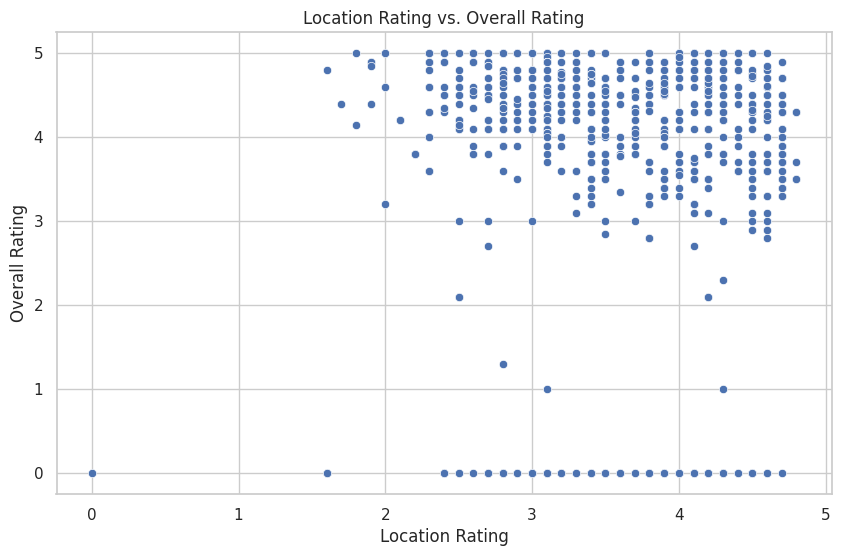

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Location Rating', y='Overall Rating', data=data)
plt.title("Location Rating vs. Overall Rating")
plt.xlabel("Location Rating")
plt.ylabel("Overall Rating")
plt.show()

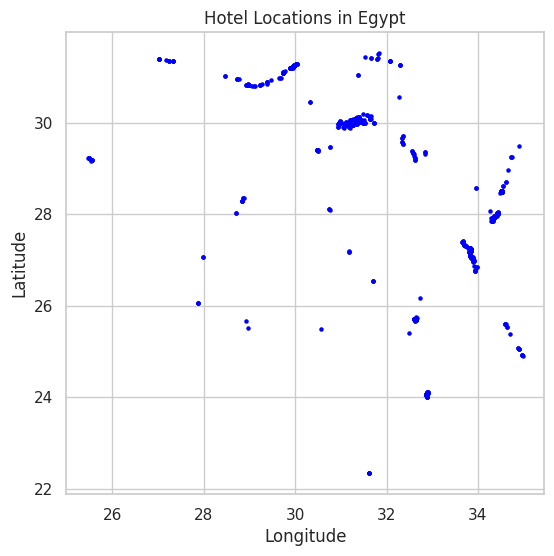

In [38]:
data['geometry'] = data.apply(lambda x: Point(float(x['Longitude']), float(x['Latitude'])), axis=1)
gdf = gpd.GeoDataFrame(data, geometry='geometry')

gdf.plot(marker='o', color='blue', markersize=5)
plt.title("Hotel Locations in Egypt")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

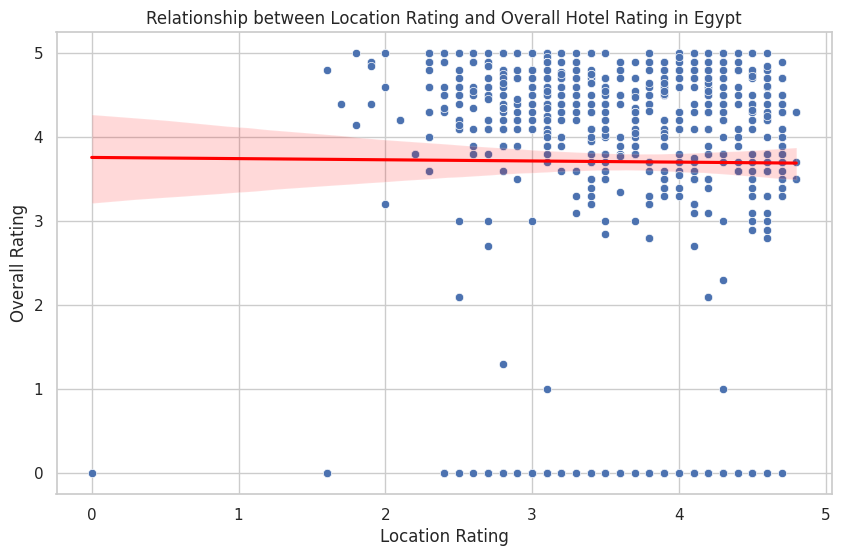

In [39]:
sns.scatterplot(x='Location Rating', y='Overall Rating', data=data)
sns.regplot(x='Location Rating', y='Overall Rating', data=data, scatter=False, color='red')
plt.title("Relationship between Location Rating and Overall Hotel Rating in Egypt")
plt.xlabel("Location Rating")
plt.ylabel("Overall Rating")
plt.show()


# Interactive Map

In [49]:
##Map Packages
import folium
from folium import Marker
from folium.plugins import MarkerCluster, HeatMap

In [50]:
# Define the center and restricted bounds for Egypt
map_center = [26.8206, 30.8025]  # Egypt's central coordinates
bounds = [[22, 24], [32, 37]]    # Approximate lat/lon boundaries for Egypt

In [51]:
# Create the map with specific tile and zoom settings
m = folium.Map(
    location=map_center,
    zoom_start=6,
    tiles="OpenStreetMap",  # Use OpenStreetMap for better compatibility
    max_bounds=True
)
m.fit_bounds(bounds)  # Restrict the view to Egypt's bounds

In [52]:
# Use a MarkerCluster to avoid marker clutter
marker_cluster = MarkerCluster().add_to(m)

# Color-coding function for hotel ratings
def get_color(rating):
    if rating >= 4:
        return 'green'
    elif 2 <= rating < 4:
        return 'orange'
    else:
        return 'red'

# Add markers to the map with color-coding and detailed popups
for idx, row in data.iterrows():
    color = get_color(row['Overall Rating'])
    popup_content = (f"<strong>{row['Name']}</strong><br>"
                     f"Rating: {row['Overall Rating']}<br>"
                     f"Rate per Night: {row['Rate per Night (Lowest)']}<br>"
                     f"Location Rating: {row['Location Rating']}")

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_content,
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)


In [53]:
# Add a heatmap layer to show density
heat_data = [[row['Latitude'], row['Longitude']] for idx, row in data.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(m)

# Add a legend to explain color coding for ratings
legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 150px; height: 100px;
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px;">
    <h4>Rating Legend</h4>
    <i style="background: green; width: 15px; height: 15px; display: inline-block;"></i> High (4+)<br>
    <i style="background: orange; width: 15px; height: 15px; display: inline-block;"></i> Medium (2-4)<br>
    <i style="background: red; width: 15px; height: 15px; display: inline-block;"></i> Low (<2)<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m


In [54]:
##we want to make this map in English, because a lot of tourists can not read Arabic

In [55]:
map_center = [26.8206, 30.8025]
bounds = [[22, 24], [32, 37]]

In [57]:
m = folium.Map(
    location=map_center,
    zoom_start=6,
    tiles="CartoDB Positron",
    attr="Map data © OpenStreetMap contributors, CC-BY-SA, Imagery © CartoDB", ##this overlay helped with translations
    max_bounds=True
)
m.fit_bounds(bounds)

marker_cluster = MarkerCluster().add_to(m)

In [58]:
def get_color(rating):
    if rating >= 4:
        return 'green'
    elif 2 <= rating < 4:
        return 'orange'
    else:
        return 'red'

for idx, row in data.iterrows():
    color = get_color(row['Overall Rating'])
    popup_content = (f"<strong>{row['Name']}</strong><br>"
                     f"Rating: {row['Overall Rating']}<br>"
                     f"Rate per Night: {row['Rate per Night (Lowest)']}<br>"
                     f"Location Rating: {row['Location Rating']}")

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_content,
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

In [59]:
heat_data = [[row['Latitude'], row['Longitude']] for idx, row in data.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(m)

legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 150px; height: 100px;
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px;">
    <h4>Rating Legend</h4>
    <i style="background: green; width: 15px; height: 15px; display: inline-block;"></i> High (4+)<br>
    <i style="background: orange; width: 15px; height: 15px; display: inline-block;"></i> Medium (2-4)<br>
    <i style="background: red; width: 15px; height: 15px; display: inline-block;"></i> Low (<2)<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

m

In [60]:
m.save("Egypt_Hotel_Map.html")

In [61]:
# Ensure you have your map object, 'm'
from google.colab import files

# Save the map as an HTML file
m.save("Enhanced_Hotel_Ratings_Map_English.html")

# Download the file
files.download("Enhanced_Hotel_Ratings_Map_English.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>